<a href="https://colab.research.google.com/github/sergioGarcia91/TRE_NN_MesaLosSantos/blob/main/08_Porosity_Surface__Map_100models_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import geopandas as gp

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Change letter

In [ ]:
!wget https://github.com/justrajdeep/fonts/raw/master/Times%20New%20Roman.ttf

--2025-01-06 20:17:56--  https://github.com/justrajdeep/fonts/raw/master/Times%20New%20Roman.ttf
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/justrajdeep/fonts/master/Times%20New%20Roman.ttf [following]
--2025-01-06 20:17:56--  https://raw.githubusercontent.com/justrajdeep/fonts/master/Times%20New%20Roman.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 834452 (815K) [application/octet-stream]
Saving to: ‘Times New Roman.ttf’

Times New Roman.ttf 100%[===================>] 814.89K  --.-KB/s    in 0.04s   

2025-01-06 20:17:56 (20.7 MB/s) - ‘Times New Roman.ttf’ saved [834452/834452]



In [ ]:
import matplotlib.font_manager as fm

In [ ]:
font_path = 'Times New Roman.ttf'
font_prop = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)

font_name = font_prop.get_name()
font_name

'Times New Roman'

In [ ]:
plt.rcParams['font.family'] = font_name

# Load data

In [ ]:
path_save_plots = '/content/drive/MyDrive/Manuscritos_Investigacion/ModelosGeofisica_NN_MesaLosSantos_Congreso2023/Figures/'
path_save_models = '/content/drive/MyDrive/Manuscritos_Investigacion/ModelosGeofisica_NN_MesaLosSantos_Congreso2023/100NN_models_maps_v2/'
path_shapefiles = '/content/drive/MyDrive/Manuscritos_Investigacion/ModelosGeofisica_NN_MesaLosSantos_Congreso2023/Shapes/'

<Axes: >

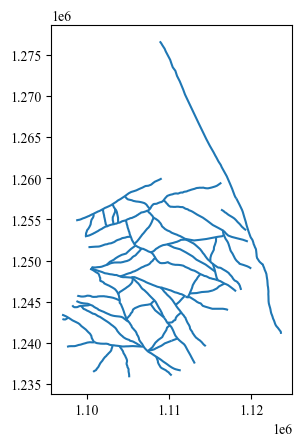

In [ ]:
faults = 'Fallas_Mesa_corregido2.shp'
faults = gp.read_file(path_shapefiles + faults)
faults.plot()

<Axes: >

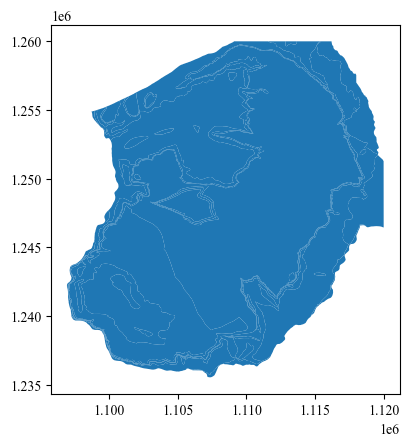

In [ ]:
geo = 'geologia_mesa_2.shp'
geo = gp.read_file(path_shapefiles + geo)
geo.plot()

## CSV map

In [ ]:
dfMapaSup = pd.read_csv(path_save_models + 'geo_mapa_sup2.csv')
dfMapaSup.columns = ['coorX', 'coorY', 'coorZ', 'distFault', 'Unidad']
dfMapaSup.head()

,coorX,coorY,coorZ,distFault,Unidad
0,1109036.77,1259898.34,1284.0,48.773613,K1ls_mi
1,1109136.77,1259898.34,1309.0,99.600276,K1ls_mi
2,1109236.77,1259898.34,1317.0,161.484813,K1ls_mi
3,1109336.77,1259898.34,1330.0,247.283448,K1ls_mi
4,1109436.77,1259898.34,1350.0,340.903116,K1ls_mi


In [ ]:
dfMapaSup['Unidad'].unique()

array(['K1ls_mi', 'J1-2j', 'OSs', 'J1gp', 'K1ls_mm', 'K1ls_ms', 'K1r',
       'K1p', 'K1t'], dtype=object)

## Data normalization

In [ ]:
dfMapaSup['codigoUnidad'] = dfMapaSup['Unidad'].replace({'OSs':0, #silgara
                                                         'J1gp':1, #granito
                                                         'J1-2j':2, #jordan
                                                         'K1ls_mi':3, #santos inf
                                                         'K1ls_mm':4, #santos med
                                                         'K1ls_ms':5, #santo sup
                                                         'K1r':6, #rosablanca
                                                         'K1p':7, #paja
                                                         'K1t':8}) #tablazo

<ipython-input-12-64f375b3c396>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfMapaSup['codigoUnidad'] = dfMapaSup['Unidad'].replace({'OSs':0, #silgara


In [ ]:
dfMapaSup['X_norm'] = (dfMapaSup['coorX'] - 1096700) / (1120100 - 1096700)
dfMapaSup['Y_norm'] = (dfMapaSup['coorY'] - 1235500) / (1260100 - 1235500)
dfMapaSup['Z_norm'] = (dfMapaSup['coorZ'] - (0)) / (1830 - (0))
dfMapaSup['Df_norm'] = (dfMapaSup['distFault'] - (000)) / (3000 - (000))
dfMapaSup.head()

,coorX,coorY,coorZ,distFault,Unidad,codigoUnidad,X_norm,Y_norm,Z_norm,Df_norm
0,1109036.77,1259898.34,1284.0,48.773613,K1ls_mi,3,0.527212,0.991802,0.701639,0.016258
1,1109136.77,1259898.34,1309.0,99.600276,K1ls_mi,3,0.531486,0.991802,0.715301,0.033200
2,1109236.77,1259898.34,1317.0,161.484813,K1ls_mi,3,0.535759,0.991802,0.719672,0.053828
3,1109336.77,1259898.34,1330.0,247.283448,K1ls_mi,3,0.540033,0.991802,0.726776,0.082428
4,1109436.77,1259898.34,1350.0,340.903116,K1ls_mi,3,0.544306,0.991802,0.737705,0.113634


In [ ]:
mapaSupEntrada = dfMapaSup[['X_norm', 'Y_norm',	'Z_norm',	'Df_norm', 'codigoUnidad']]
mapaSupEntrada

,X_norm,Y_norm,Z_norm,Df_norm,codigoUnidad
0,0.527212,0.991802,0.701639,0.016258,3
1,0.531486,0.991802,0.715301,0.033200,3
2,0.535759,0.991802,0.719672,0.053828,3
3,0.540033,0.991802,0.726776,0.082428,3
4,0.544306,0.991802,0.737705,0.113634,3
...,...,...,...,...,...
40820,0.467383,0.008063,0.240999,0.628693,2
40821,0.450289,0.003998,0.240984,0.696013,2
40822,0.454563,0.003998,0.241530,0.724802,2
40823,0.458836,0.003998,0.239966,0.699951,2


In [ ]:
mapaSupEntrada  = pd.get_dummies(mapaSupEntrada, columns=['codigoUnidad'],
                                 prefix='',
                                 dtype=int)

mapaSupEntrada.head()

,X_norm,Y_norm,Z_norm,Df_norm,_0,_1,_2,_3,_4,_5,_6,_7,_8
0,0.527212,0.991802,0.701639,0.016258,0,0,0,1,0,0,0,0,0
1,0.531486,0.991802,0.715301,0.033200,0,0,0,1,0,0,0,0,0
2,0.535759,0.991802,0.719672,0.053828,0,0,0,1,0,0,0,0,0
3,0.540033,0.991802,0.726776,0.082428,0,0,0,1,0,0,0,0,0
4,0.544306,0.991802,0.737705,0.113634,0,0,0,1,0,0,0,0,0


# Models list

In [ ]:
models_list = os.listdir(path_save_models)
models_list = [model for model in models_list if model.endswith('.pkl')]
print(len(models_list))
models_list

100


['model_map2_NN_016.pkl',
 'model_map2_NN_017.pkl',
 'model_map2_NN_018.pkl',
 'model_map2_NN_019.pkl',
 'model_map2_NN_020.pkl',
 'model_map2_NN_021.pkl',
 'model_map2_NN_022.pkl',
 'model_map2_NN_023.pkl',
 'model_map2_NN_024.pkl',
 'model_map2_NN_025.pkl',
 'model_map2_NN_026.pkl',
 'model_map2_NN_027.pkl',
 'model_map2_NN_028.pkl',
 'model_map2_NN_029.pkl',
 'model_map2_NN_030.pkl',
 'model_map2_NN_031.pkl',
 'model_map2_NN_032.pkl',
 'model_map2_NN_033.pkl',
 'model_map2_NN_034.pkl',
 'model_map2_NN_035.pkl',
 'model_map2_NN_036.pkl',
 'model_map2_NN_037.pkl',
 'model_map2_NN_038.pkl',
 'model_map2_NN_039.pkl',
 'model_map2_NN_040.pkl',
 'model_map2_NN_041.pkl',
 'model_map2_NN_042.pkl',
 'model_map2_NN_043.pkl',
 'model_map2_NN_044.pkl',
 'model_map2_NN_045.pkl',
 'model_map2_NN_046.pkl',
 'model_map2_NN_047.pkl',
 'model_map2_NN_048.pkl',
 'model_map2_NN_049.pkl',
 'model_map2_NN_050.pkl',
 'model_map2_NN_051.pkl',
 'model_map2_NN_052.pkl',
 'model_map2_NN_053.pkl',
 'model_map2

## Best tested model

The variable name will be kept as **model_thesis** since it is being copied from notebook 03; however, it refers to the best model with the test score among the 100.

In [ ]:
model_thesis = path_save_models + 'model_map2_NN_033.pkl'
model_thesis = joblib.load(model_thesis)

model_thesis

MLPRegressor(early_stopping=True, hidden_layer_sizes=(26, 13, 7, 3),
             learning_rate='adaptive', max_iter=6000, n_iter_no_change=20,
             tol=1e-05, validation_fraction=0.2)

# Predict

# Thesis model (Model 33)

In [ ]:
dfMapaSup['Porosity thesis'] = model_thesis.predict(mapaSupEntrada)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


In [ ]:
dfMapaSup.head()

,coorX,coorY,coorZ,distFault,Unidad,codigoUnidad,X_norm,Y_norm,Z_norm,Df_norm,Porosity thesis
0,1109036.77,1259898.34,1284.0,48.773613,K1ls_mi,3,0.527212,0.991802,0.701639,0.016258,3.041980
1,1109136.77,1259898.34,1309.0,99.600276,K1ls_mi,3,0.531486,0.991802,0.715301,0.033200,2.967871
2,1109236.77,1259898.34,1317.0,161.484813,K1ls_mi,3,0.535759,0.991802,0.719672,0.053828,2.888242
3,1109336.77,1259898.34,1330.0,247.283448,K1ls_mi,3,0.540033,0.991802,0.726776,0.082428,2.764758
4,1109436.77,1259898.34,1350.0,340.903116,K1ls_mi,3,0.544306,0.991802,0.737705,0.113634,2.628900


## 100 models

In [ ]:
models_list

['model_map2_NN_016.pkl',
 'model_map2_NN_017.pkl',
 'model_map2_NN_018.pkl',
 'model_map2_NN_019.pkl',
 'model_map2_NN_020.pkl',
 'model_map2_NN_021.pkl',
 'model_map2_NN_022.pkl',
 'model_map2_NN_023.pkl',
 'model_map2_NN_024.pkl',
 'model_map2_NN_025.pkl',
 'model_map2_NN_026.pkl',
 'model_map2_NN_027.pkl',
 'model_map2_NN_028.pkl',
 'model_map2_NN_029.pkl',
 'model_map2_NN_030.pkl',
 'model_map2_NN_031.pkl',
 'model_map2_NN_032.pkl',
 'model_map2_NN_033.pkl',
 'model_map2_NN_034.pkl',
 'model_map2_NN_035.pkl',
 'model_map2_NN_036.pkl',
 'model_map2_NN_037.pkl',
 'model_map2_NN_038.pkl',
 'model_map2_NN_039.pkl',
 'model_map2_NN_040.pkl',
 'model_map2_NN_041.pkl',
 'model_map2_NN_042.pkl',
 'model_map2_NN_043.pkl',
 'model_map2_NN_044.pkl',
 'model_map2_NN_045.pkl',
 'model_map2_NN_046.pkl',
 'model_map2_NN_047.pkl',
 'model_map2_NN_048.pkl',
 'model_map2_NN_049.pkl',
 'model_map2_NN_050.pkl',
 'model_map2_NN_051.pkl',
 'model_map2_NN_052.pkl',
 'model_map2_NN_053.pkl',
 'model_map2

In [ ]:
df_16models = pd.DataFrame()

for model in models_list:
  nn_model = model[11:17]
  model = joblib.load(path_save_models + model)
  df_16models[nn_model] = model.predict(mapaSupEntrada)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPRegressor 

In [ ]:
df_16models.head()

,NN_016,NN_017,NN_018,NN_019,NN_020,NN_021,NN_022,NN_023,NN_024,NN_025,...,NN_006,NN_007,NN_008,NN_009,NN_010,NN_011,NN_012,NN_013,NN_014,NN_015
0,2.229562,2.471334,2.150029,2.082985,2.102360,2.486913,2.152437,1.551996,2.901965,1.827161,...,2.647643,1.879242,2.443950,2.790554,2.346697,1.814953,1.971890,2.626611,3.059258,4.164618
1,2.245936,2.376052,2.081722,2.413652,2.354261,2.160942,2.064546,2.096572,2.919375,1.229107,...,2.671381,2.095522,2.565121,2.725167,2.033274,2.946503,2.199931,2.708944,3.038359,4.036109
2,2.152716,2.189903,1.980218,3.139806,2.784365,1.802050,1.792376,2.792441,2.883075,0.311170,...,2.550556,2.315242,2.613312,2.613865,1.772229,4.440180,2.344497,2.774419,2.968821,3.777713
3,2.034488,1.814765,1.844948,3.339147,3.555056,1.641380,1.510236,4.861566,2.825709,0.145670,...,2.387566,3.550025,2.703568,2.465133,1.424571,6.029818,2.535757,2.894596,2.838451,3.411527
4,1.928178,1.192878,1.744687,3.221176,4.669514,2.128635,1.432898,7.710682,2.778387,0.026513,...,2.245529,4.195252,2.832012,2.218179,1.106722,5.487246,2.914205,3.001479,2.703081,3.033490


## Mean and Standard deviation

In [ ]:
dfMapaSup['Mean 100models'] = df_16models.mean(axis=1)
dfMapaSup['Std 100models'] = df_16models.std(axis=1)

dfMapaSup.head()

,coorX,coorY,coorZ,distFault,Unidad,codigoUnidad,X_norm,Y_norm,Z_norm,Df_norm,Porosity thesis,Mean 100models,Std 100models
0,1109036.77,1259898.34,1284.0,48.773613,K1ls_mi,3,0.527212,0.991802,0.701639,0.016258,3.041980,2.351776,0.440737
1,1109136.77,1259898.34,1309.0,99.600276,K1ls_mi,3,0.531486,0.991802,0.715301,0.033200,2.967871,2.494452,0.521727
2,1109236.77,1259898.34,1317.0,161.484813,K1ls_mi,3,0.535759,0.991802,0.719672,0.053828,2.888242,2.665696,0.855624
3,1109336.77,1259898.34,1330.0,247.283448,K1ls_mi,3,0.540033,0.991802,0.726776,0.082428,2.764758,2.938604,1.415628
4,1109436.77,1259898.34,1350.0,340.903116,K1ls_mi,3,0.544306,0.991802,0.737705,0.113634,2.628900,3.044246,1.848189


# Plot

In [ ]:
dfMapaSup.columns

Index(['coorX', 'coorY', 'coorZ', 'distFault', 'Unidad', 'codigoUnidad',
       'X_norm', 'Y_norm', 'Z_norm', 'Df_norm', 'Porosity thesis',
       'Mean 100models', 'Std 100models'],
      dtype='object')

In [ ]:
dfMapaSup.describe().round(2)

,coorX,coorY,coorZ,distFault,codigoUnidad,X_norm,Y_norm,Z_norm,Df_norm,Porosity thesis,Mean 100models,Std 100models
count,40825.00,40825.00,40825.00,40825.00,40825.00,40825.00,40825.00,40825.00,40825.00,40825.00,40825.00,40825.00
mean,1108740.99,1248026.61,1263.17,522.61,3.85,0.51,0.51,0.69,0.17,4.50,4.59,2.10
std,5523.04,6250.78,363.08,401.28,2.03,0.24,0.25,0.20,0.13,4.24,3.71,1.07
min,1097036.77,1235598.34,301.12,0.05,0.00,0.01,0.00,0.16,0.00,-6.02,-1.13,0.34
25%,1104236.77,1242798.34,1040.00,200.96,2.00,0.32,0.30,0.57,0.07,1.59,1.53,1.33
50%,1108736.77,1248098.34,1289.00,438.81,5.00,0.51,0.51,0.70,0.15,3.78,3.85,1.80
75%,1113236.77,1253298.34,1624.00,759.42,5.00,0.71,0.72,0.89,0.25,6.54,6.90,2.57
max,1119936.77,1259898.34,1819.00,2605.49,8.00,0.99,0.99,0.99,0.87,21.22,16.64,8.27


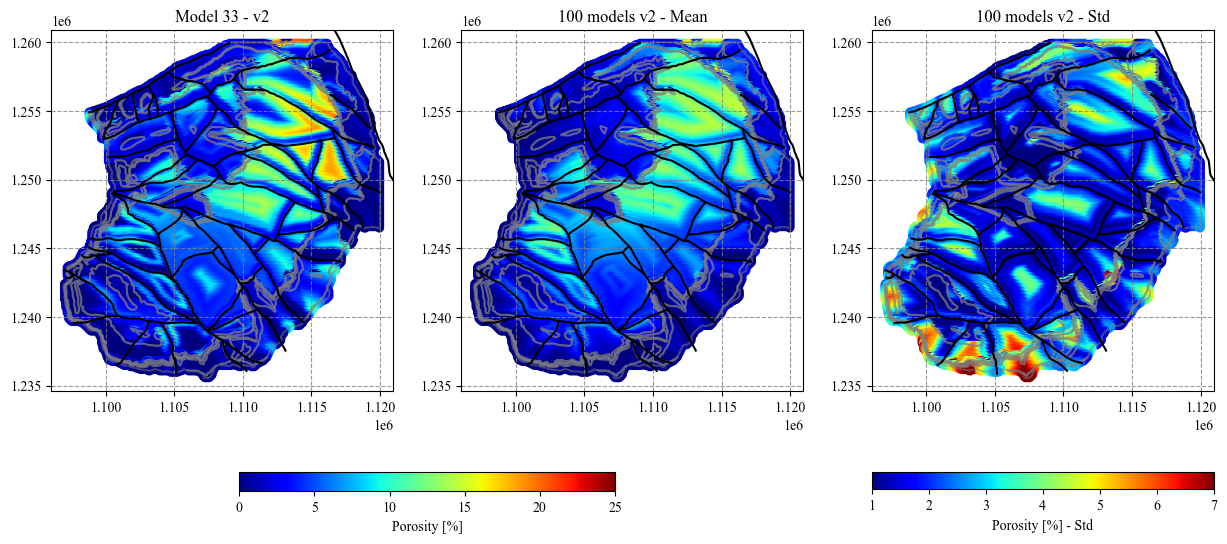

In [ ]:
x_min = dfMapaSup['coorX'].min() - 1000
x_max = dfMapaSup['coorX'].max() + 1000

y_min = dfMapaSup['coorY'].min() - 1000
y_max = dfMapaSup['coorY'].max() + 1000

fig, ax = plt.subplots(1,3, figsize=(15, 7))

mp = ax[0].scatter(dfMapaSup['coorX'], dfMapaSup['coorY'],
              c=dfMapaSup['Porosity thesis'], cmap='jet',
              vmin=0, vmax=25)
geo.boundary.plot(ax=ax[0], color="gray", alpha=0.5)
faults.plot(ax=ax[0], color="black")
ax[0].set_xlim(x_min, x_max)
ax[0].set_ylim(y_min, y_max)
ax[0].set_title('Model 33 - v2')
ax[0].grid(ls='--', color='grey', alpha=0.8)

ax[1].scatter(dfMapaSup['coorX'], dfMapaSup['coorY'],
              c=dfMapaSup['Mean 100models'], cmap='jet',
              vmin=0, vmax=25)
geo.boundary.plot(ax=ax[1], color="gray", alpha=0.5)
faults.plot(ax=ax[1], color="black")
ax[1].set_xlim(x_min, x_max)
ax[1].set_ylim(y_min, y_max)
ax[1].set_title('100 models v2 - Mean')
ax[1].grid(ls='--', color='grey', alpha=0.8)

mp2 = ax[2].scatter(dfMapaSup['coorX'], dfMapaSup['coorY'],
                    c=dfMapaSup['Std 100models'], cmap='jet',
                    vmin=1, vmax=7)
geo.boundary.plot(ax=ax[2], color="gray", alpha=0.5)
faults.plot(ax=ax[2], color="black")
ax[2].set_xlim(x_min, x_max)
ax[2].set_ylim(y_min, y_max)
ax[2].set_title('100 models v2 - Std')
ax[2].grid(ls='--', color='grey', alpha=0.8)

plt.colorbar(mp, ax=ax[0:2], shrink=0.5, label='Porosity [%]', orientation='horizontal')
plt.colorbar(mp2, ax=ax[2], shrink=1, label='Porosity [%] - Std', orientation='horizontal')

plt.savefig(path_save_plots + f'Maps_100models_v2.png',
            dpi=500,
            bbox_inches = 'tight',
            pad_inches=0.25)

plt.show()

# End